In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BMAX=9250
BLIM_LO = 0.15*BMAX
BLIM_HI = 0.95*BMAX
ENP_MARGIN = 3000
BSAFE_LO = 0.35*BMAX
BSAFE_HI = 0.65*BMAX
BOPT = 0.5*BMAX
ENP_MARGIN = 0.3*BMAX
enp_limit = ENP_MARGIN/2 


In [3]:
def r1(bmean): 
#     bmean = np.mean(self.btrack)
    
    bdev = np.abs(BOPT - bmean)
    # bdev ranges from bdev = (0,0.5) of BMAX
    # based on the sigmoid function
    sharpness = 80
    enp_limit = ENP_MARGIN/2 #r1(bdev-enp_limit) = 0 when bdev = enp_limit
    r = 1 - 2/ (1 + np.exp(-sharpness*(bdev - ENP_MARGIN/2)/BMAX))

    return r

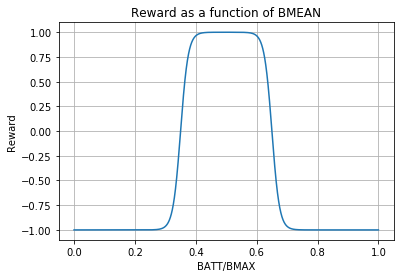

In [4]:
x = np.arange(0,9250)
y = [r1(i) for i in x]
plt.title('Reward as a function of BMEAN')
plt.plot(x/9250,y)
plt.xlabel('BATT/BMAX')
plt.ylabel('Reward')
plt.grid(True)

In [5]:
def r2(enp): 
    r = 1-(10/3)*(enp)/BMAX
    return r

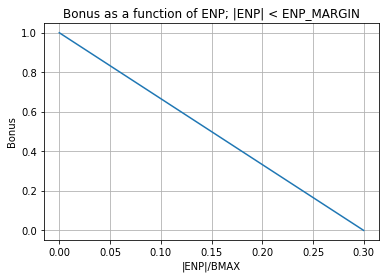

In [6]:
x = np.arange(0,0.3*9250)
y = [r2(i) for i in x]
plt.title('Bonus as a function of ENP; |ENP| < ENP_MARGIN')
plt.plot(x/9250,y)
plt.xlabel('|ENP|/BMAX')
plt.ylabel('Bonus')
plt.grid(True)

In [7]:
def rwdfn(bmean,enp):
    reward = 0
    bdev = np.abs(BOPT - bmean)

    if (bmean<BLIM_LO or bmean>BLIM_HI): #if battery is outside critical limits
        reward -= 10*np.abs(enp-ENP_MARGIN)/BMAX - 1

    else: #if battery is within critical limits
        # based on the sigmoid function
        sharpness = 80
        #reward(bdev-enp_limit) = 0 when bdev = enp_limit
        reward += 1 - 2 / (1 + np.exp(-sharpness*(bdev - ENP_MARGIN/2)/BMAX))
        
        if (bmean>BSAFE_LO and bmean<BSAFE_HI and np.abs(enp)<=ENP_MARGIN): #if enp is within limits
            bonus = 1-(10/3)*np.abs(enp)/BMAX
            reward = reward*3**bonus
        else:
            reward = reward
    return reward

In [8]:
bmean = np.arange(0,9250,100)
enp = np.arange(-9250,9250,100)
y_rec = np.empty((bmean.size,enp.size))

for i in np.arange(bmean.size):
    for j in np.arange(enp.size):
        y_rec[i,j] = rwdfn(bmean[i],enp[j])

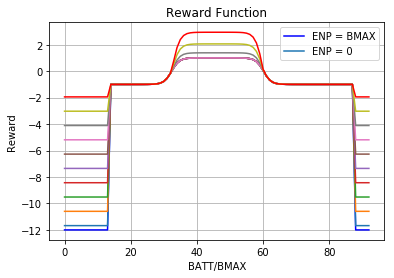

In [10]:
plt.plot(y_rec[:,0], color = 'b')
plt.plot(y_rec[:,3])
plt.plot(y_rec[:,13])
plt.plot(y_rec[:,23])
plt.plot(y_rec[:,33])
plt.plot(y_rec[:,43])
plt.plot(y_rec[:,53])
plt.plot(y_rec[:,63])
plt.plot(y_rec[:,73])
plt.plot(y_rec[:,83])
plt.plot(y_rec[:,93],color = 'r')
plt.title('Reward Function')
plt.xlabel('BATT/BMAX')
plt.ylabel('Reward')
plt.grid(True)
plt.legend(['ENP = BMAX','ENP = 0'])